# Introdução à Ciência dos Dados &mdash; Projeto Final

Alunos: Artur Franco (anf), Lucas Glasner (lgr3)

## 2 &mdash; Análise exploratória dos dados

A análise exploratória dos dados (AED) é um passo importante, como todos os outros, na área de `Data Science`, e pode ser feita utilizando algum tipo de estatística descritiva ou análise de gráficos, com o intuito de se familiarizar com os dados e entender melhor sobre a natureza dos mesmos. Através da AED, nós buscamos confirmar hipóteses, ou seja, obter resposta para algumas perguntas previamente pensadas, como por exemplo: 
1. É mais provável ocorrerem acidentes em bairros de classe mais baixa?
* É mais provável ocorrerem infrações de trânsito no horário da noite?
* Para a maioria dos acidentes foi registrada uma multa?

Nós não obtivemos resposta para a pergunta 3, uma vez que pela natureza do problema real e do próprio `dataset`, não encontramos uma maneira para tal. Já para as perguntas 1 e 2, obtivemos as respostas que irão ser vistas no decorrer deste `notebook`. Buscamos ainda detectar novas hipóteses, as quais poderão ser vistas também no decorrer deste `notebook`.

Para realizar a análise exploratória dos dados foram utilizadas alguns recursos disponíveis para `Python`. Foram  elas: a biblioteca `pandas` (para tratamento e análise de dados) e o pacote `pyplot` da biblioteca `matplotlib` (para visualização de gráficos).

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

% matplotlib inline

### 2.1 &mdash; Análise exploratória dos dados sobre acidentes de trânsito

In [122]:
# Lendo datasets tratados
acidentes2016 = pd.read_csv('treated-datasets/acidentes-2016.csv', sep=',', index_col=0)
acidentes2015 = pd.read_csv('treated-datasets/acidentes-2015.csv', sep=',', index_col=0)

print('DATASET REFERENTE AOS ACIDENTES DE TRÂNSITO EM RECIFE/2016')
display(acidentes2016.head())
print(' ')
print('DATASET REFERENTE AOS ACIDENTES DE TRÂNSITO EM RECIFE/2015')
display(acidentes2015.head())

DATASET REFERENTE AOS ACIDENTES DE TRÂNSITO EM RECIFE/2016


,data,hora,endereco,bairro,natureza,tipo
0,2016-01-01,00:58,Av Jornalista Possidonio Cavalcanti Bastos,Iputinga,COLISÃO,SEM VÍTIMA
1,2016-01-01,01:23,Av Engenheiro Domingos Ferreira,Boa Viagem,COLISÃO,SEM VÍTIMA
2,2016-01-01,01:42,Rua Dr Alvaro Ferraz,Jordão,COLISÃO,SEM VÍTIMA
3,2016-01-01,03:08,Av Jornalista Costa Porto,Ibura,COLISÃO,SEM VÍTIMA
4,2016-01-01,05:34,Av Governador Agamenon Magalhaes,Paissandu,CHOQUE,COM VÍTIMA


 
DATASET REFERENTE AOS ACIDENTES DE TRÂNSITO EM RECIFE/2015


,data,hora,endereco,bairro,natureza,tipo
0,2015-12-03,11:36,Av Norte,Casa Amarela,COLISÃO,SEM VÍTIMA
1,2015-06-01,06:35,Est De Belem,Encruzilhada,COLISÃO,SEM VÍTIMA
2,2015-06-01,08:04,Rua Ernesto De Paula Santos,Boa Viagem,COLISÃO,SEM VÍTIMA
3,2015-06-01,08:06,Av Sul,Afogados,COLISÃO,SEM VÍTIMA
4,2015-06-01,08:13,Rua Benfica,Madalena,COLISÃO,SEM VÍTIMA


In [123]:
# Quantidade de acidentes de trânsito registrados em 2015 e 1026
print('De acordo com os dados...')
print('{} acidentes de trânsito foram registrados na cidade do Recife em 2015 (Entre Junho e Dezembro)'.format(acidentes2015.shape[0]))
print('{} acidentes de trânsito foram registrados na cidade do Recife em 2016 (Entre Janeiro e Outubro)'.format(acidentes2016.shape[0]))

print(' ')

# Para 2015: 7169 acidentes em 7 meses (Junho a Dezembro)
# Média: cerca de 1024 acidentes por mês
# Supondo quantidade de acidentes em cada mês restante (Janeiro a Maio) = 1024 (média)
# Nova quantidade total de acidentes = 7169 + 1024*5 = 12289
totalAcidentes2015 = 12889

# Para 2016: 9130 acidentes em 10 meses (Janeiro a Outubro)
# Média: 913 acidentes por mês
# Supondo quantidade de acidentes em cada mês restante (Novembro e Dezembro) = 913 (média)
# Nova quantidade total de acidentes = 9130 + 913*2 = 10956
totalAcidentes2016 = 10956

# Melhorando estimativa da quantidade de acidentes de trânsito registrados em 2015 e 1026
print('Melhorando a estimativa...')
print('{} acidentes de trânsito foram registrados na cidade do Recife em 2015'.format(totalAcidentes2015))
print('{} acidentes de trânsito foram registrados na cidade do Recife em 2016'.format(totalAcidentes2016))

print(' ')

crescimento = totalAcidentes2016 - totalAcidentes2015
porcentagem_crescimento = round((crescimento*100)/totalAcidentes2015,2)
print('Decaimento de cerca de {}% no número de acidentes de trânsito em Recife'.format(abs(porcentagem_crescimento)))

De acordo com os dados...
7169 acidentes de trânsito foram registrados na cidade do Recife em 2015 (Entre Junho e Dezembro)
9130 acidentes de trânsito foram registrados na cidade do Recife em 2016 (Entre Janeiro e Outubro)
 
Melhorando a estimativa...
12889 acidentes de trânsito foram registrados na cidade do Recife em 2015
10956 acidentes de trânsito foram registrados na cidade do Recife em 2016
 
Decaimento de cerca de 15.0% no número de acidentes de trânsito em Recife


---BAIRROS ONDE MAIS OCORRERAM ACIDENTES---
Jan a Out/2016: Boa Viagem - 1297 (ou 14.21% dos) acidentes
Jun a Dez/2015: Boa Viagem - 943 (ou 13.15% dos) acidentes
 


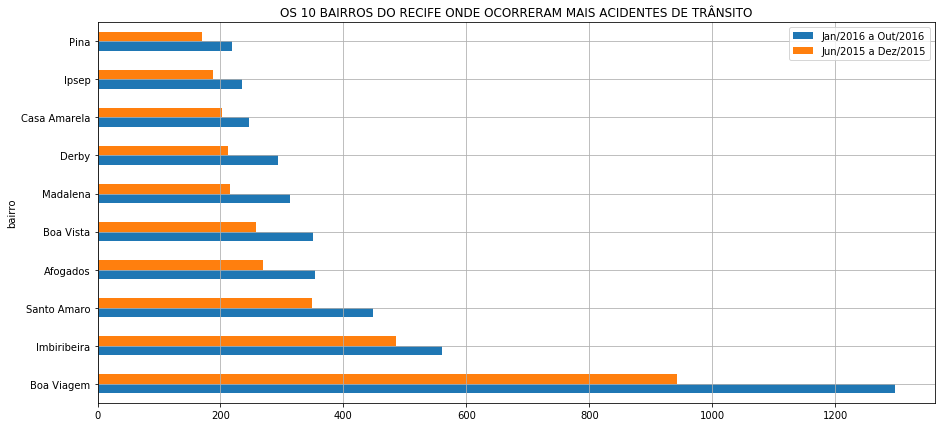

In [124]:
# Plots
top10_bairros2016 = acidentes2016.groupby('bairro').size().sort_values(ascending=False)[:10]
top10_bairros2016.to_frame()
top10_bairros2015 = acidentes2015.groupby('bairro').size().sort_values(ascending=False)[:10]
top10_bairros2015.to_frame()
top10_bairros = pd.concat([top10_bairros2016, top10_bairros2015], axis=1)
top10_bairros.columns = ['Jan/2016 a Out/2016','Jun/2015 a Dez/2015']
top10_bairros.plot.barh(title='OS 10 BAIRROS DO RECIFE ONDE OCORRERAM MAIS ACIDENTES DE TRÂNSITO',
                        grid=True, figsize=(15,7))

# MODAS

# Bairro onde mais ocorreu acidentes em 2016
bairro_moda2016 = acidentes2016.bairro.mode()[0]
qtd_bairro2016 = acidentes2016.groupby('bairro').size().sort_values(ascending=False)[0]

# Bairro onde mais ocorreu acidentes em 2015
bairro_moda2015 = acidentes2015.bairro.mode()[0]
qtd_bairro2015 = acidentes2015.groupby('bairro').size().sort_values(ascending=False)[0]

# Calculando porcentagens
pct_bairro2016 = round(qtd_bairro2016*100.0/acidentes2016.shape[0], 2)
pct_bairro2015 = round(qtd_bairro2015*100.0/acidentes2015.shape[0], 2)

print('---BAIRROS ONDE MAIS OCORRERAM ACIDENTES---')
print('Jan a Out/2016: {} - {} (ou {}% dos) acidentes'.format(bairro_moda2016, qtd_bairro2016, pct_bairro2016))
print('Jun a Dez/2015: {} - {} (ou {}% dos) acidentes'.format(bairro_moda2015, qtd_bairro2015, pct_bairro2015))
print(' ')

---ENDEREÇOS ONDE MAIS OCORRERAM ACIDENTES---
Jan a Out/2016: Av Governador Agamenon Magalhaes - 394 (ou 4.32% dos) acidentes
Jun a Dez/2015: Av Marechal Mascarenhas De Moraes - 346 (ou 4.32% dos) acidentes


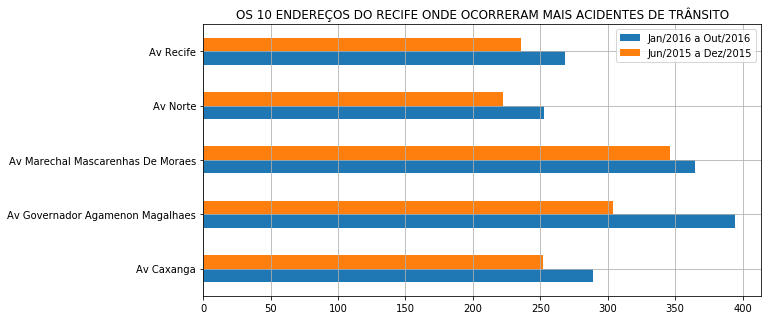

In [125]:
# PLOTS

top10_enderecos2016 = acidentes2016.groupby('endereco').size().sort_values(ascending=False)[:5]
top10_enderecos2016.to_frame()
top10_enderecos2015 = acidentes2015.groupby('endereco').size().sort_values(ascending=False)[:5]
top10_enderecos2015.to_frame()
top10_enderecos = pd.concat([top10_enderecos2016, top10_enderecos2015], axis=1)
top10_enderecos.columns = ['Jan/2016 a Out/2016','Jun/2015 a Dez/2015']
top10_enderecos.plot.barh(title='OS 10 ENDEREÇOS DO RECIFE ONDE OCORRERAM MAIS ACIDENTES DE TRÂNSITO',
                        grid=True, figsize=(10,5))

# MODAS

# Endereço onde mais ocorreu acidentes em 2016
endereco_moda2016 = acidentes2016.endereco.mode()[0]
qtd_endereco2016 = acidentes2016.groupby('endereco').size().sort_values(ascending=False)[0]

# Endereço onde mais ocorreu acidentes em 2015
endereco_moda2015 = acidentes2015.endereco.mode()[0]
qtd_endereco2015 = acidentes2015.groupby('endereco').size().sort_values(ascending=False)[0]

# Calculando porcentagens
pct_endereco2016 = round(qtd_endereco2016*100.0/acidentes2016.shape[0], 2)
pct_endereco2015 = round(qtd_endereco2015*100.0/acidentes2015.shape[0], 2)

print('---ENDEREÇOS ONDE MAIS OCORRERAM ACIDENTES---')
print('Jan a Out/2016: {} - {} (ou {}% dos) acidentes'.format(endereco_moda2016, qtd_endereco2016, pct_endereco2016))
print('Jun a Dez/2015: {} - {} (ou {}% dos) acidentes'.format(endereco_moda2015, qtd_endereco2015, pct_endereco2016))

In [126]:
# Input -> hora no padrão hh:mm 
# Return -> range ou intervalo na forma [hh, hh+1) no qual a hora de entrada está
def criaRangeHora(hora):
    h = hora[:2]
    if h[0] == '0':
        if h[1] == '9':
            return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'
        else:
            return '[' + h + 'h, 0' + str(int(h[:2])+1) + 'h)'
    elif h[0] == '2':
        if h[1] == '3':
            return '[' + h + 'h, 00h)'
        else:
            return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'
    else:
        return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'

# Input -> hora no padrão hh:mm
# Return -> período do dia relativo à hora de entrada (manhã, tarde, noite, madrugada)
def periodoDoDia(hora):
    h = hora[:2]
    manha = ['06','07','08','09','10','11']
    tarde = ['12','13','14','15','16','17']
    noite = ['18','19','20','21','22','23']
    
    if h in manha:
        return 'manhã'
    elif h in tarde:
        return 'tarde'
    elif h in noite:
        return 'noite'
    else:
        return 'madrugada'

# Input -> data no padrão yy-mm-dd
# Return -> string referente ao mês da data de entrada
def retornaMes(data):
    mes = data.split('-')[1]
    
    if mes == '01':
        return 'Jan'
    elif mes == '02':
        return 'Fev'
    elif mes == '03':
        return 'Mar'
    elif mes == '04':
        return 'Abr'
    elif mes == '05':
        return 'Mai'
    elif mes == '06':
        return 'Jun'
    elif mes == '07':
        return 'Jul'
    elif mes == '08':
        return 'Ago'
    elif mes == '09':
        return 'Set'
    elif mes == '10':
        return 'Out'
    elif mes == '11':
        return 'Nov'
    else:
        return 'Dez'

In [127]:
# Criando colunas extras
acidentes2016['range_hora'] = acidentes2016['hora'].apply(lambda x: criaRangeHora(x))
acidentes2016['periodo_dia'] = acidentes2016['hora'].apply(lambda x: periodoDoDia(x))
acidentes2016['mes'] = acidentes2016['data'].apply(lambda x: retornaMes(x))

acidentes2015['range_hora'] = acidentes2015['hora'].apply(lambda x: criaRangeHora(x))
acidentes2015['periodo_dia'] = acidentes2015['hora'].apply(lambda x: periodoDoDia(x))
acidentes2015['mes'] = acidentes2015['data'].apply(lambda x: retornaMes(x))

acidentes2016.head(10)

,data,hora,endereco,bairro,natureza,tipo,range_hora,periodo_dia,mes
0,2016-01-01,00:58,Av Jornalista Possidonio Cavalcanti Bastos,Iputinga,COLISÃO,SEM VÍTIMA,"[00h, 01h)",madrugada,Jan
1,2016-01-01,01:23,Av Engenheiro Domingos Ferreira,Boa Viagem,COLISÃO,SEM VÍTIMA,"[01h, 02h)",madrugada,Jan
2,2016-01-01,01:42,Rua Dr Alvaro Ferraz,Jordão,COLISÃO,SEM VÍTIMA,"[01h, 02h)",madrugada,Jan
3,2016-01-01,03:08,Av Jornalista Costa Porto,Ibura,COLISÃO,SEM VÍTIMA,"[03h, 04h)",madrugada,Jan
4,2016-01-01,05:34,Av Governador Agamenon Magalhaes,Paissandu,CHOQUE,COM VÍTIMA,"[05h, 06h)",madrugada,Jan
5,2016-01-01,07:26,Av Sul,Cabanga,COLISÃO,COM VÍTIMA,"[07h, 08h)",manhã,Jan
6,2016-01-01,07:29,Av Engenheiro Domingos Ferreira,Boa Viagem,COLISÃO,SEM VÍTIMA,"[07h, 08h)",manhã,Jan
7,2016-01-01,09:31,Rua Coronel Urbano Ribeiro De Sena,Cajueiro,COLISÃO,SEM VÍTIMA,"[09h, 10h)",manhã,Jan
8,2016-01-01,07:41,Av Marechal Mascarenhas De Moraes,Imbiribeira,COLISÃO,SEM VÍTIMA,"[07h, 08h)",manhã,Jan
9,2016-01-01,08:35,Av Engenheiro Domingos Ferreira,Boa Viagem,COLISÃO,COM VÍTIMA,"[08h, 09h)",manhã,Jan


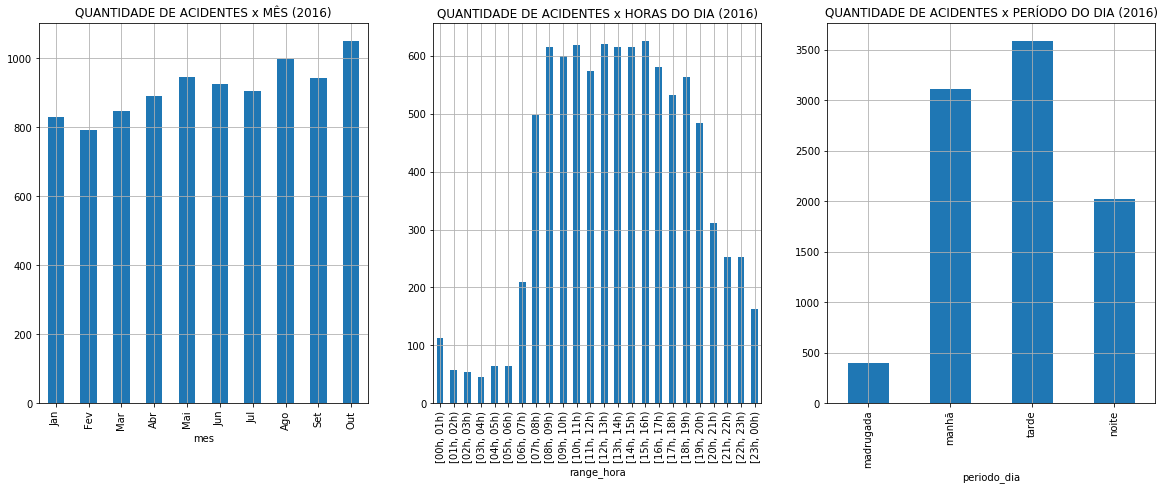

In [128]:
# Ordem dos valores no eixo x dos gráficos
meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out']
periodos = ['madrugada','manhã','tarde','noite']
horas = ['[00h, 01h)','[01h, 02h)','[02h, 03h)','[03h, 04h)','[04h, 05h)','[05h, 06h)','[06h, 07h)','[07h, 08h)',
        '[08h, 09h)','[09h, 10h)','[10h, 11h)','[11h, 12h)','[12h, 13h)','[13h, 14h)','[14h, 15h)','[15h, 16h)',
        '[16h, 17h)','[17h, 18h)','[18h, 19h)','[19h, 20h)','[20h, 21h)','[21h, 22h)','[22h, 23h)','[23h, 00h)']

# PLOTS
fig, ax = plt.subplots(ncols=3,figsize=(20,7))

acidentesXmes2016 = acidentes2016.groupby('mes').size()
acidentesXmes2016 = acidentesXmes2016.reindex(meses)
acidentesXmes2016.plot.bar(title='QUANTIDADE DE ACIDENTES x MÊS (2016)', grid=True, ax=ax[0])

acidentesXhoras2016 = acidentes2016.groupby('range_hora').size()
acidentesXhoras2016 = acidentesXhoras2016.reindex(horas)
acidentesXhoras2016.plot.bar(title='QUANTIDADE DE ACIDENTES x HORAS DO DIA (2016)', grid=True, ax=ax[1])

acidentesXperiodo2016 = acidentes2016.groupby('periodo_dia').size()
acidentesXperiodo2016 = acidentesXperiodo2016.reindex(periodos)
acidentesXperiodo2016.plot.bar(title='QUANTIDADE DE ACIDENTES x PERÍODO DO DIA (2016)', grid=True, ax=ax[2])

### 2.2 &mdash; Análise exploratória dos dados sobre registros de infrações de trânsito

In [129]:
# Lendo datasets tratados
multas2016 = pd.read_csv('treated-datasets/infracoes-transito-2016.csv', sep=',', index_col=0)
multas2015 = pd.read_csv('treated-datasets/infracoes-transito-2015.csv', sep=',', index_col=0)

print('DATASET REFERENTE AOS REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2016')
display(multas2016.head())
print(' ')
print('DATASET REFERENTE AOS REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2015')
display(multas2015.head())

DATASET REFERENTE AOS REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2016


,data_infracao,hora_infracao,data_implantacao,agente_equipamento
0,2015-12-30,11:10,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
1,2015-12-20,08:20,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
2,2015-12-24,20:15,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
3,2015-12-28,13:50,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
4,2015-12-28,13:55,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL


 
DATASET REFERENTE AOS REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2015


,data_infracao,hora_infracao,data_implantacao,agente_equipamento
0,2015-10-26,08:42,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
1,2015-10-26,08:45,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
2,2015-10-26,08:48,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
3,2015-10-26,08:55,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
4,2015-10-26,09:10,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL


In [130]:
print('{} infrações de trânsito foram registradas na cidade do Recife em 2015'.format(multas2015.shape[0]))
print('{} infrações de trânsito foram registradas na cidade do Recife em 2016'.format(multas2016.shape[0]))

crescimento = multas2016.shape[0] - multas2015.shape[0]
porcentagem_crescimento = round((crescimento*100)/multas2015.shape[0],2)
print('Decaimento de {}% no número de infrações de trânsito registradas em Recife, entre 2015 e 2016.'.format(abs(porcentagem_crescimento)))

629158 infrações de trânsito foram registradas na cidade do Recife em 2015
570798 infrações de trânsito foram registradas na cidade do Recife em 2016
Decaimento de 9.28% no número de infrações de trânsito registradas em Recife, entre 2015 e 2016.


In [131]:
# Meio que mais implantou multas de trânsito em 2016
equip_moda2016 = multas2016.agente_equipamento.mode()[0]
qtd_equip2016 = multas2016.groupby('agente_equipamento').size().sort_values(ascending=False)[0]

# Meio que mais implantou multas de trânsito em 2015
equip_moda2015 = multas2015.agente_equipamento.mode()[0]
qtd_equip2015 = multas2015.groupby('agente_equipamento').size().sort_values(ascending=False)[0]

# Calculando porcentagens
pct_equip2016 = round(qtd_equip2016*100.0/multas2016.shape[0], 2)
pct_equip2015 = round(qtd_equip2015*100.0/multas2015.shape[0], 2)

print('---MEIOS QUE MAIS IMPLANTARAM MULTAS---')
print('2016: {} - {} (ou {}% das) infrações registradas'.format(equip_moda2016, qtd_equip2016, pct_equip2016))
print('2015: {} - {} (ou {}% das) infrações registradas'.format(equip_moda2015, qtd_equip2015, pct_equip2015))

---MEIOS QUE MAIS IMPLANTARAM MULTAS---
2016: Código 3 - LOMBADA ELETRÔNICA - 245458 (ou 43.0% das) infrações registradas
2015: Código 3 - LOMBADA ELETRÔNICA - 316780 (ou 50.35% das) infrações registradas


In [132]:
# Criando colunas extras utilizando funções definidas previamente
multas2016['range_hora'] = multas2016['hora_infracao'].apply(lambda x: criaRangeHora(x))
multas2016['periodo_dia'] = multas2016['hora_infracao'].apply(lambda x: periodoDoDia(x))
multas2016['mes'] = multas2016['data_implantacao'].apply(lambda x: retornaMes(x))

multas2015['range_hora'] = multas2015['hora_infracao'].apply(lambda x: criaRangeHora(x))
multas2015['periodo_dia'] = multas2015['hora_infracao'].apply(lambda x: periodoDoDia(x))
multas2015['mes'] = multas2015['data_implantacao'].apply(lambda x: retornaMes(x))

multas2016.head()

,data_infracao,hora_infracao,data_implantacao,agente_equipamento,range_hora,periodo_dia,mes
0,2015-12-30,11:10,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[11h, 12h)",manhã,Jan
1,2015-12-20,08:20,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[08h, 09h)",manhã,Jan
2,2015-12-24,20:15,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[20h, 21h)",noite,Jan
3,2015-12-28,13:50,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[13h, 14h)",tarde,Jan
4,2015-12-28,13:55,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[13h, 14h)",tarde,Jan


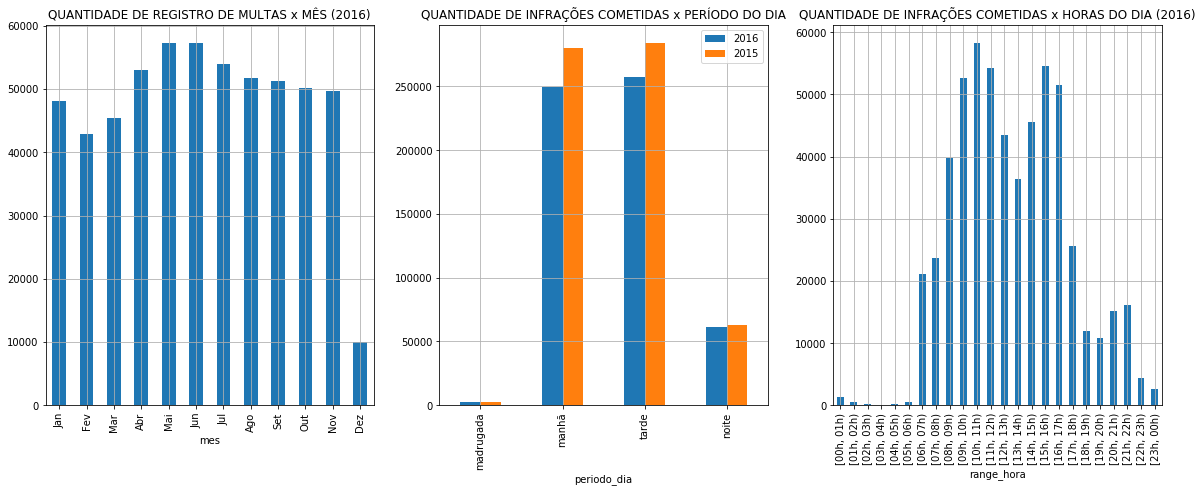

In [133]:
# Ordem dos valores no eixo x dos gráficos
meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
periodos = ['madrugada','manhã','tarde','noite']
horas = ['[00h, 01h)','[01h, 02h)','[02h, 03h)','[03h, 04h)','[04h, 05h)','[05h, 06h)','[06h, 07h)','[07h, 08h)',
        '[08h, 09h)','[09h, 10h)','[10h, 11h)','[11h, 12h)','[12h, 13h)','[13h, 14h)','[14h, 15h)','[15h, 16h)',
        '[16h, 17h)','[17h, 18h)','[18h, 19h)','[19h, 20h)','[20h, 21h)','[21h, 22h)','[22h, 23h)','[23h, 00h)']

# PLOTS
fig, ax = plt.subplots(ncols=3,figsize=(20,7))

multasXmes2016 = multas2016.groupby('mes').size()
multasXmes2016 = multasXmes2016.reindex(meses)
multasXmes2016.plot.bar(title='QUANTIDADE DE REGISTRO DE MULTAS x MÊS (2016)', grid=True, ax=ax[0])

multasXhoras2016 = multas2016.groupby('range_hora').size()
multasXhoras2016 = multasXhoras2016.reindex(horas)
multasXhoras2016.plot.bar(title='QUANTIDADE DE INFRAÇÕES COMETIDAS x HORAS DO DIA (2016)', grid=True, ax=ax[2])

multasXperiodo2016 = multas2016.groupby('periodo_dia').size()
multasXperiodo2016 = multasXperiodo2016.reindex(periodos)
multasXperiodo2015 = multas2015.groupby('periodo_dia').size()
multasXperiodo2015 = multasXperiodo2015.reindex(periodos)
multasXperiodo2016 = multasXperiodo2016.to_frame()
multasXperiodo2015 = multasXperiodo2015.to_frame()
multasXperiodo2016.columns = ['2016']
multasXperiodo2015.columns = ['2015']
multasXperiodo = pd.concat([multasXperiodo2016, multasXperiodo2015], axis=1)
multasXperiodo.plot.bar(title='QUANTIDADE DE INFRAÇÕES COMETIDAS x PERÍODO DO DIA', grid=True, ax=ax[1])

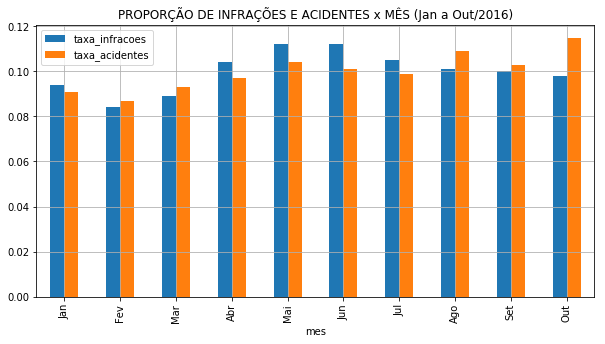

In [220]:
qtdAcidentes2016 = acidentes2016.shape[0]
qtdMultas2016 = multas2016[(multas2016.mes != 'Nov') & (multas2016.mes != 'Dez')].shape[0]

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out']

multasPorMes2016 = multas2016.groupby('mes').size()
multasPorMes2016 = multasPorMes2016.reindex(meses)
acidentesPorMes2016 = acidentes2016.groupby('mes').size()
acidentesPorMes2016 = acidentesPorMes2016.reindex(meses)
multasPorMes2016 = multasPorMes2016.to_frame()
acidentesPorMes2016 = acidentesPorMes2016.to_frame()
multasPorMes2016.columns = ['qtd_infracoes']
acidentesPorMes2016.columns = ['qtd_acidentes']

multasPorMes2016['taxa_infracoes'] = multasPorMes2016['qtd_infracoes'].apply(lambda x: round(x/qtdMultas2016,3))
acidentesPorMes2016['taxa_acidentes'] = acidentesPorMes2016['qtd_acidentes'].apply(lambda x: round(x/qtdAcidentes2016,3))

multasPorMes2016.drop(['qtd_infracoes'], axis=1, inplace=True)
acidentesPorMes2016.drop(['qtd_acidentes'], axis=1, inplace=True)

taxa_maXmes2016 = pd.concat([multasPorMes2016, acidentesPorMes2016], axis=1)

taxa_maXmes2016.plot.bar(title='PROPORÇÃO DE INFRAÇÕES E ACIDENTES x MÊS (Jan a Out/2016)', grid=True, figsize=(10,5))

### 2.3 &mdash; Técnica de aprendizagem

--------MATRIZ DE CORRELAÇÃO--------


,taxa_infracoes,taxa_acidentes
taxa_infracoes,1.000000,0.521628
taxa_acidentes,0.521628,1.000000


 
-------------------------------REGRESSÃO LINEAR-------------------------------


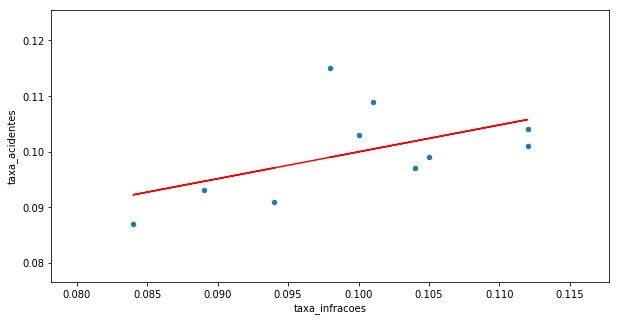

In [238]:
from scipy.stats import linregress

X = taxa_maXmes2016['taxa_infracoes'].values.copy()
y = taxa_maXmes2016['taxa_acidentes'].values

model = linregress(X,y)
b0 = model.intercept
b1 = model.slope 

figs, ax = plt.subplots(1,1,figsize=(10,5))
taxa_maXmes2016[['taxa_infracoes','taxa_acidentes']].plot.scatter(x='taxa_infracoes', y='taxa_acidentes', ax=ax)
ax.plot(taxa_maXmes2016['taxa_infracoes'], taxa_maXmes2016['taxa_infracoes'].map(lambda x: b1*x+b0), color='red')

# 0.5 a 0.7 positivo ou negativo indica uma correlação moderada. (Wikipedia)
print('--------MATRIZ DE CORRELAÇÃO--------')
display(taxa_maXmes2016.corr())
#print('r2: {}'.format(round(model.rvalue**2, 3)))
#print('p-value: {}'.format(round(model.pvalue,3)))

print(' ')
print('-------------------------------REGRESSÃO LINEAR-------------------------------')

In [193]:
import geopandas as gpd
from geopy.geocoders import Nominatim

% matplotlib inline

bairrosRecife = gpd.read_file('treated-datasets/bairros-recife.geojson')

#bairrosRecife['bairro_cidade'] = bairrosRecife['bairro_nome'].apply(lambda x: x + ', Recife')

#bairrosRecife.drop(['bairro_codigo','bairro_nome','bairro_nome_ca','microrregiao','rpa'], axis=1, inplace=True)

def getCoordinates(bairro):
    geolocator = Nominatim()
    local = geolocator.geocode(bairro)
    coordenadas = (local.latitude, local.longitude)
    return coordenadas

#bairrosRecife['coordenadas'] = bairrosRecife['bairro_cidade'].apply(lambda x: getCoordinates(x))

# centroid = POINT (-34.95027281989323 -8.052599927939683)
# representative point = POINT (-34.95093985502128 -8.0531717371898)
rp = bairrosRecife.geometry.representative_point()[0]
print(rp.y)

-8.0531717371898
